In [1]:

# https://github.com/timestocome


# Lovecraft Corpus
# https://github.com/vilmibm/lovecraftcorpus



# use PCA to see similarity between stories

In [2]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt

In [3]:
# silence is golden

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action="ignore",category=DeprecationWarning)
warnings.filterwarnings(action="ignore",category=FutureWarning)


In [4]:
# list all files under the input directory
import os

fNames = []
for dirname, _, filenames in os.walk('lovecraftcorpus'):
    for filename in filenames:
        fNames.append(os.path.join(dirname, filename))

#print(fNames)
print(len(fNames))

67


In [5]:
# read in all files, split into sentences, do a bit of cleanup to reduce vocabulary size

from nltk.tokenize import word_tokenize
import functools
import re

stories = []

for f in fNames:
    fp = open(f)
    story = fp.read()
    
    story = story.lower()
    story = re.sub('-', ' ', story)
    story = re.sub(" \'", ' ', story)
    story = re.sub('\"', ' ', story)
    story = re.sub('\d', '9', story)
    
    # split into list of words then back into a string
    wt = (word_tokenize(story))
    ws = ' '.join(w for w in wt)
    
    stories.append(ws)
    

n_stories = len(stories)



In [6]:
# assign a story number as a target 

targets = np.arange(n_stories)
    
print('targets %d data %d' %(len(targets), len(stories)))

targets 67 data 67


In [7]:
# store stories and targets in a df


train = pd.DataFrame(targets)
train.columns = ['target']
train['stories'] = stories

print(train.tail())





    target                                            stories
62      62  the statement of randolph carter i repeat to y...
63      63  through the gates of the silver key chapter on...
64      64  the shadow over innsmouth i during the winter ...
65      65  nyarlathotep nyarlathotep ... the crawling cha...
66      66  memory in the valley of nis the accursed wanin...


In [8]:
# TruncatedSVD produces same output as PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.casual import casual_tokenize
from sklearn.decomposition import TruncatedSVD


# compute tf-idf
tfidf_model = TfidfVectorizer(tokenizer=casual_tokenize)

tfidf_model.fit(raw_documents=train['stories'])
tfidf_docs = tfidf_model.transform(train['stories'])

# compute svd
svd = TruncatedSVD(n_components=16, n_iter=100)
svd_topic_vectors = svd.fit_transform(tfidf_docs)
svd_topic_vectors = pd.DataFrame(svd_topic_vectors)


print('svd topic vectors')
print(svd_topic_vectors.round(3).head())


# normalize svd
svd_topic_vectors = (svd_topic_vectors.T / np.linalg.norm(svd_topic_vectors, axis=1)).T

# dot
svd_tv = svd_topic_vectors.dot(svd_topic_vectors.T.round(2))



print('svd dot svd')
print(svd_tv.round(2).head(10))




svd topic vectors
      0      1      2      3      4      5      6      7      8      9   \
0  0.921  0.043  0.095 -0.014  0.023 -0.075 -0.049 -0.024  0.044  0.094   
1  0.927  0.183 -0.103 -0.062  0.028 -0.038  0.050 -0.029 -0.017  0.072   
2  0.900  0.049 -0.158 -0.055 -0.032 -0.003 -0.007 -0.008  0.014  0.017   
3  0.894  0.082 -0.119 -0.003 -0.015  0.042  0.010 -0.085 -0.074  0.017   
4  0.958  0.068 -0.084 -0.017  0.004 -0.057  0.027  0.002  0.013  0.000   

      10     11     12     13     14     15  
0 -0.061 -0.046 -0.002  0.005  0.022  0.021  
1  0.004  0.023 -0.051  0.036  0.001  0.031  
2 -0.014 -0.015 -0.082  0.015 -0.003  0.013  
3  0.044 -0.005 -0.059  0.049 -0.044 -0.010  
4 -0.028  0.012  0.013  0.009  0.001 -0.005  
svd dot svd
     0     1     2     3     4     5     6     7     8     9   ...    57  \
0  1.00  0.95  0.95  0.93  0.97  0.94  0.92  0.95  0.98  0.95  ...  0.97   
1  0.95  0.99  0.98  0.98  0.98  0.99  0.90  1.00  0.94  0.86  ...  0.97   
2  0.95  0.98  

In [9]:
# split out story names from file list for plot
import re

story_names = []

for i in range(len(fNames)):
    stry = re.search('\/(.*).txt', fNames[i])
    story_names.append('   ' + stry.group(1))
print(story_names)    

svd_tv['target'] = story_names

print(svd_tv)


['   beyond_wall_of_sleep', '   tomb', '   polaris', '   moon_bog', '   pharoahs', '   nameless', '   colour_out_of_space', '   dagon', '   hypnos', '   silver_key', '   lurking_fear', '   book', '   terrible_old_man', '   tree', '   juan_romero', '   reanimator', '   hound', '   cthulhu', '   rats_walls', '   ex_oblivione', '   medusas_coil', '   descendent', '   shadow_out_of_time', '   temple', '   cool_air', '   kadath', '   dunwich', '   shunned_house', '   alchemist', '   iranon', '   beast', '   martins_beach', '   pickman', '   outsider', '   arthur_jermyn', '   clergyman', '   charles_dexter_ward', '   he', '   festival', '   high_house_mist', '   old_folk', '   from_beyond', '   crawling_chaos', '   redhook', '   poetry_of_gods', '   what_moon_brings', '   dreams_in_the_witch', '   haunter', '   mountains_of_madness', '   other_gods', '   vault', '   doorstep', '   picture_house', '   street', '   unnamable', '   white_ship', '   ulthar', '   erich_zann', '   sarnath', '   ce

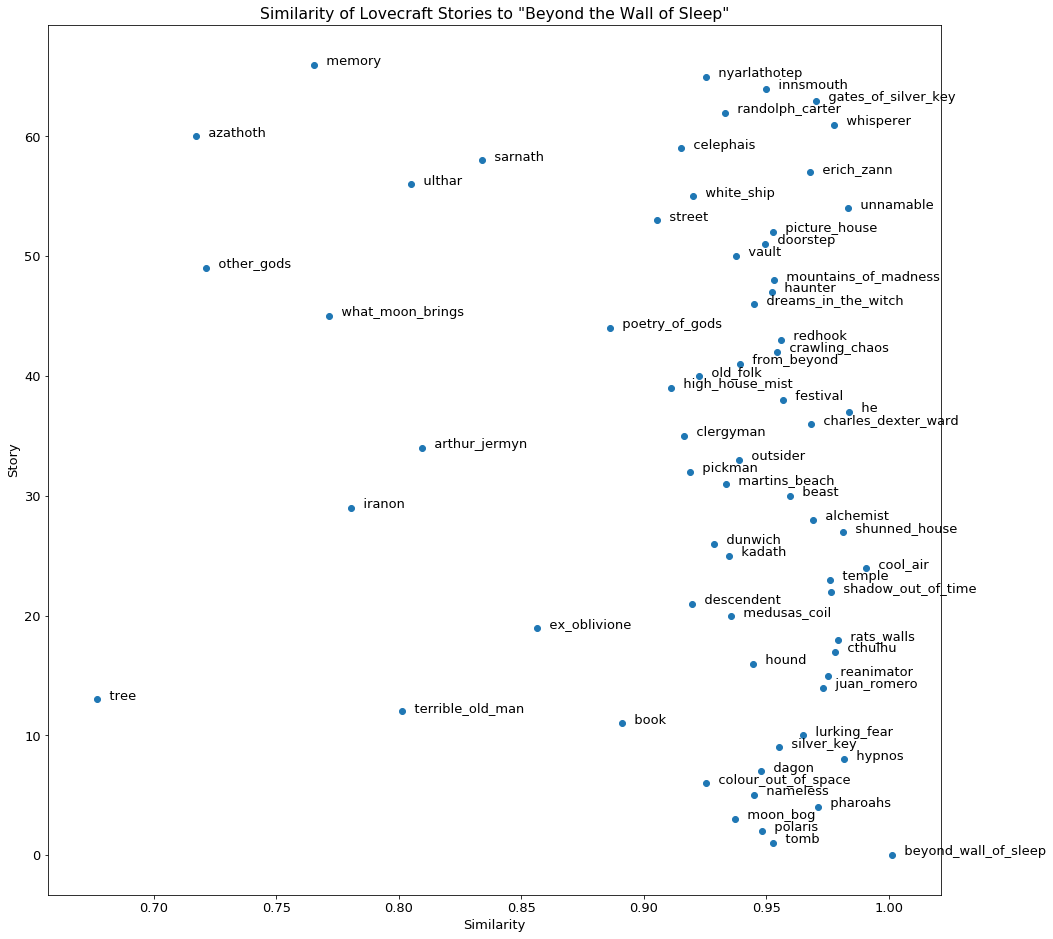

In [10]:
# plot stories tfidf mean

import matplotlib.pyplot as plt


font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)

# vector for 'Wall of Sleep'
x = svd_tv[0]   

# Story id
y = np.arange(n_stories)



fig, ax = plt.subplots(figsize=(16,16))
ax.scatter(x, y)

# label points
n = np.arange(0, n_stories)

for i, txt in enumerate(story_names):
#for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))
    
    
plt.title('Similarity of Lovecraft Stories to "Beyond the Wall of Sleep"')
plt.ylabel('Story')
plt.xlabel('Similarity')

plt.show()